<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Libraries import <font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [2]:
rent = pd.read_csv('rent_after_handling.csv')

In [3]:
rent

,Price,Prop_type,Size,Bath,Bed,Term,City,Division
0,50,3,15,0,0,/ Monthly,Valongo,Valongo
1,700,1,80,0,2,/ Monthly,Marco de Canaveses,Várzea
2,1600,2,145,3,3,/ Monthly,Porto,Cedofeita
3,1100,2,110,2,2,/ Monthly,Maia,Cidade da Maia
4,900,2,100,2,3,/ Monthly,Porto,Campanhã
...,...,...,...,...,...,...,...,...
735,350,3,124,0,0,/ Monthly,Braga,Ferreiros e Gondizalves
736,450,3,20,0,0,/ Monthly,Braga,(São José de São Lázaro e São João do Souto)
737,250,3,51,0,0,/ Monthly,Braga,(Maximinos
738,1100,3,600,0,0,/ Monthly,Vila Nova de Famalicão,Arnoso (Santa Maria e Santa Eulália) e Sezures


In [4]:
rent.dtypes

Price         int64
Prop_type     int64
Size          int64
Bath          int64
Bed           int64
Term         object
City         object
Division     object
dtype: object

In [5]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      740 non-null    int64 
 1   Prop_type  740 non-null    int64 
 2   Size       740 non-null    int64 
 3   Bath       740 non-null    int64 
 4   Bed        740 non-null    int64 
 5   Term       740 non-null    object
 6   City       740 non-null    object
 7   Division   740 non-null    object
dtypes: int64(5), object(3)
memory usage: 46.4+ KB


<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Outliers Treatment <font>

In [6]:
# finding row that's missing Bath data
rent[rent['Bath'].isnull()]



,Price,Prop_type,Size,Bath,Bed,Term,City,Division


In [7]:
rent = rent.dropna(subset = ['Bath'])

In [8]:
rent.describe()

,Price,Prop_type,Size,Bath,Bed
count,740.000000,740.000000,740.000000,740.00000,740.000000
mean,2390.117568,2.150000,732.991892,1.55000,1.989189
std,9934.385044,0.541073,10768.645222,1.21066,1.575314
min,50.000000,1.000000,10.000000,0.00000,0.000000
25%,887.500000,2.000000,72.000000,1.00000,1.000000
50%,1397.500000,2.000000,100.000000,1.00000,2.000000
75%,2100.000000,2.000000,148.000000,2.00000,3.000000
max,250000.000000,3.000000,280000.000000,7.00000,21.000000


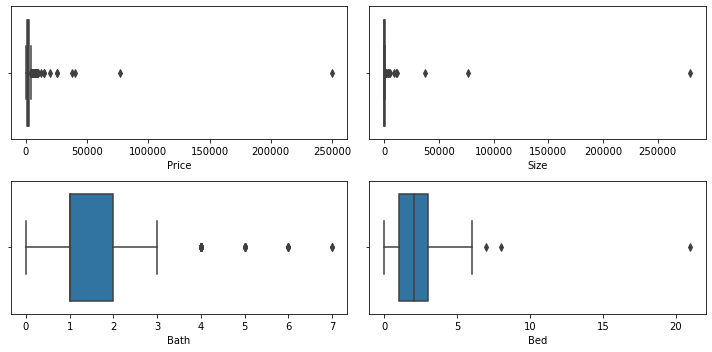

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(rent['Price'], ax = axs[0,0])
plt2 = sns.boxplot(rent['Size'], ax = axs[0,1])
plt1 = sns.boxplot(rent['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(rent['Bed'], ax = axs[1,1])

plt.tight_layout()

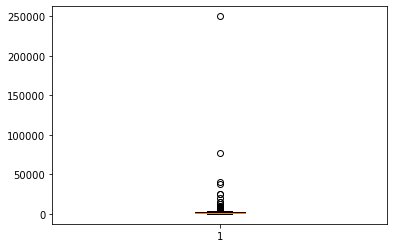

In [10]:
# outlier treatment for Price
plt.boxplot(rent.Price)
Q1 = rent.Price.quantile(0.25)
Q3 = rent.Price.quantile(0.75)
IQR = Q3 - Q1
rent = rent[(rent.Price >= Q1 - 1.5*IQR) & (rent.Price <= Q3 + 1.5*IQR)]



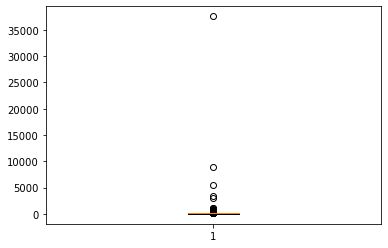

In [11]:
# outlier treatment for Size
plt.boxplot(rent.Size)
Q1 = rent.Size.quantile(0.25)
Q3 = rent.Size.quantile(0.75)
IQR = Q3 - Q1
rent = rent[(rent.Size >= Q1 - 1.5*IQR) & (rent.Size <= Q3 + 1.5*IQR)]



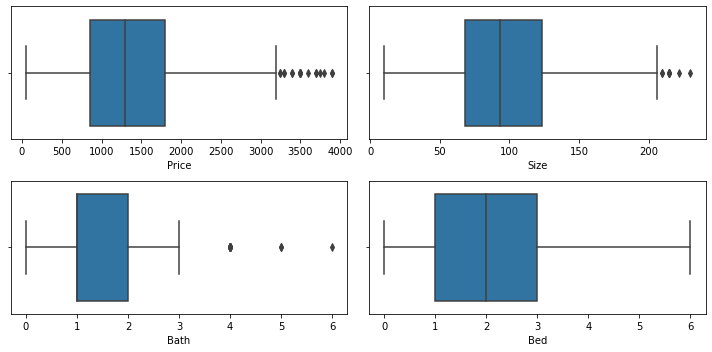

In [12]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(rent['Price'], ax = axs[0,0])
plt2 = sns.boxplot(rent['Size'], ax = axs[0,1])
plt1 = sns.boxplot(rent['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(rent['Bed'], ax = axs[1,1])

plt.tight_layout()

<font face="Lucida Handwriting
" size=6 color='#CDB79E'> EDA <font>

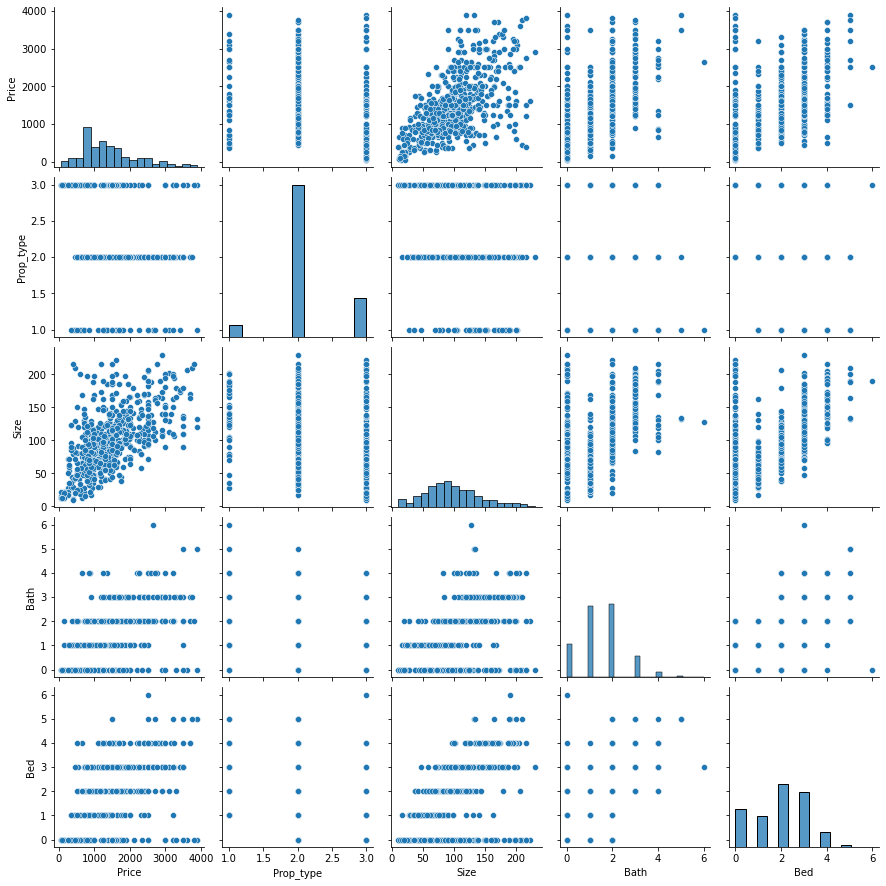

In [13]:
sns.pairplot(rent)
plt.show()

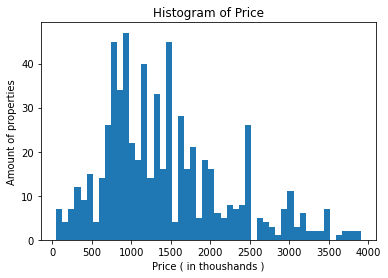

In [14]:
plt.hist(rent['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price ( in thoushands )')
plt.ylabel('Amount of properties')
plt.show()

<AxesSubplot:xlabel='Size', ylabel='Price'>

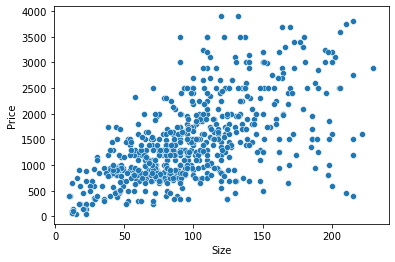

In [15]:
sns.scatterplot(x=rent['Size'], y=rent['Price'])

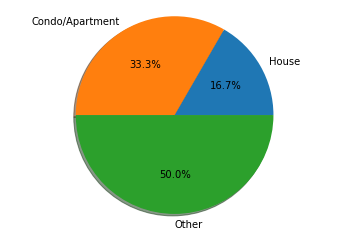

In [16]:
data = [1,2,3]
labels = ['House','Condo/Apartment','Other']
plt.pie(data,labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

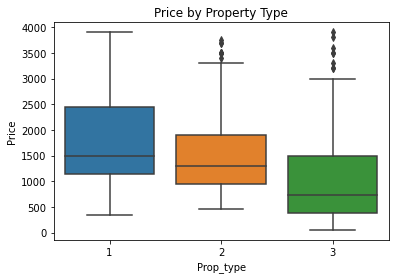

In [17]:
# Boxplot of Price by Property Type
sns.boxplot(x="Prop_type", y="Price", data=rent)
plt.title('Price by Property Type')
plt.show()

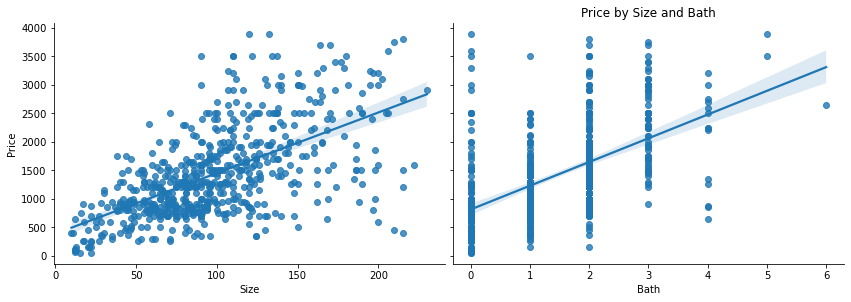

In [18]:
# Pairplot of Price by Size and Bath
sns.pairplot(data=rent, x_vars=['Size', 'Bath'], y_vars='Price', kind='reg', height=4, aspect=1.5)
plt.title('Price by Size and Bath')
plt.show()

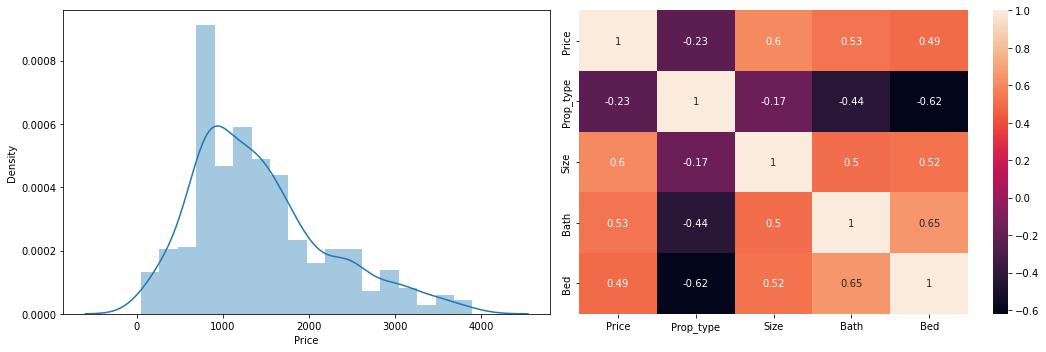

In [19]:
# histogram and heat map
corr = rent.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(rent['Price'], ax=axs[0])
sns.heatmap(corr, ax=axs[1], annot=True)
fig.tight_layout()

In [20]:
rent2=rent.copy()

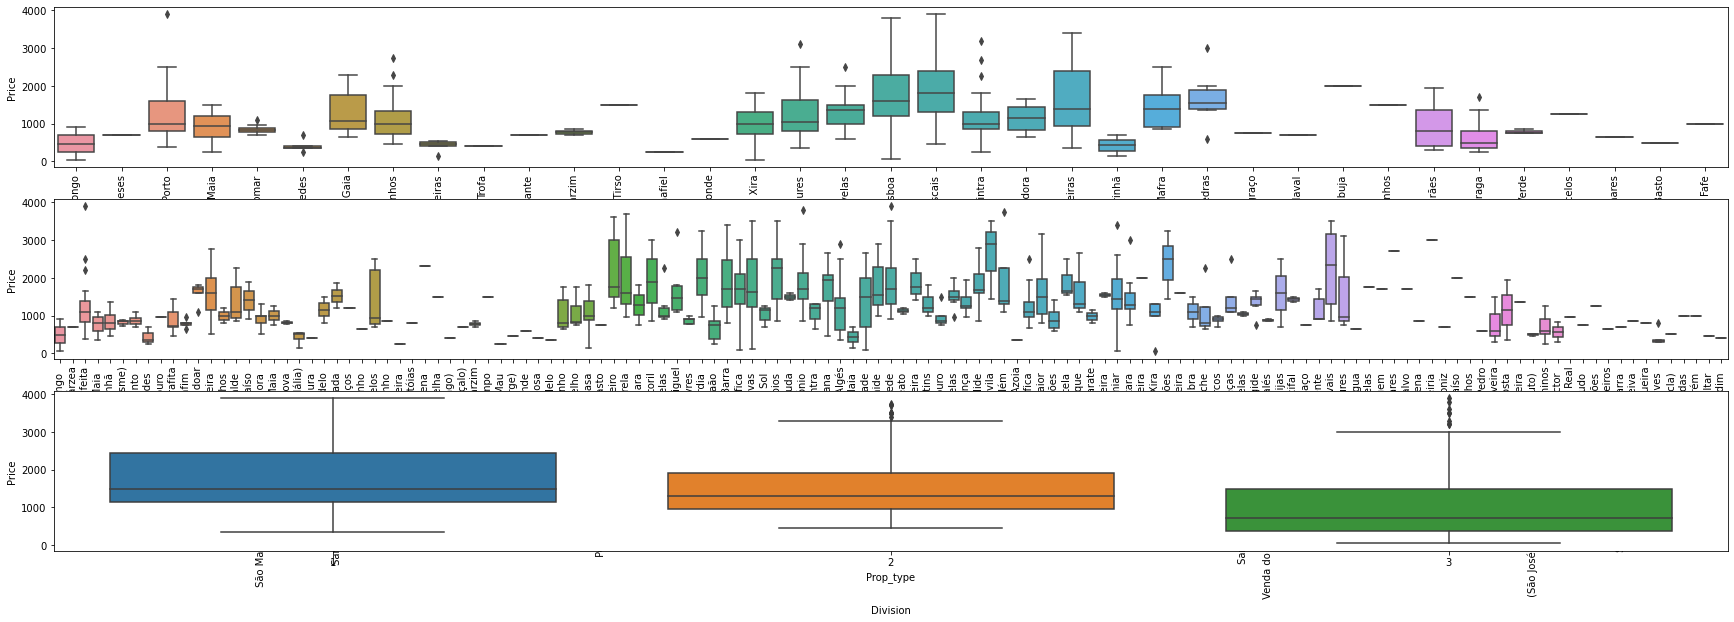

In [21]:
plt.figure(figsize=(30, 10))

plt.subplot(3,1,1)
sns.boxplot(x = 'City', y = 'Price', data = rent2)
plt.xticks(rotation='vertical')
plt.subplot(3,1,2)
sns.boxplot(x = 'Division', y = 'Price', data = rent2)
plt.xticks(rotation='vertical')
plt.subplot(3,1,3)
sns.boxplot(x = 'Prop_type', y = 'Price', data = rent2)
plt.show()

In [22]:
# dropping prop_type
rent2.drop('Prop_type',1, inplace=True) 

In [23]:
rent2.head()

,Price,Size,Bath,Bed,Term,City,Division
0,50,15,0,0,/ Monthly,Valongo,Valongo
1,700,80,0,2,/ Monthly,Marco de Canaveses,Várzea
2,1600,145,3,3,/ Monthly,Porto,Cedofeita
3,1100,110,2,2,/ Monthly,Maia,Cidade da Maia
4,900,100,2,3,/ Monthly,Porto,Campanhã


In [24]:
city_count = rent2['City'].value_counts()
city_count.head(10)

Lisboa                 247
Porto                   50
Oeiras                  48
Cascais                 45
Sintra                  41
Matosinhos              24
Braga                   23
Amadora                 19
Gondomar                19
Vila Franca de Xira     18
Name: City, dtype: int64

In [25]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 33].index)
rent2['City'] = rent2['City'].replace(minor_city, 'Other')
rent2['City'].value_counts()

Lisboa     247
Other      209
Porto       50
Oeiras      48
Cascais     45
Sintra      41
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Price'>

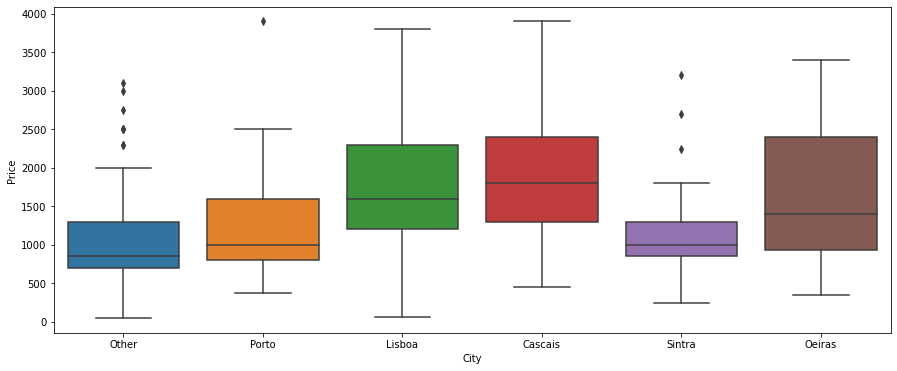

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'City', y = 'Price', data = rent2)

In [27]:
# creating dummy variables for Division
rent2.drop('Division',1, inplace=True) # dropping Division column
rent2 = pd.get_dummies(rent2, drop_first = True)

In [28]:
rent2

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Porto,City_Sintra
0,50,15,0,0,0,0,1,0,0
1,700,80,0,2,0,0,1,0,0
2,1600,145,3,3,0,0,0,1,0
3,1100,110,2,2,0,0,1,0,0
4,900,100,2,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
733,450,72,0,0,0,0,1,0,0
734,400,215,0,0,0,0,1,0,0
735,350,124,0,0,0,0,1,0,0
736,450,20,0,0,0,0,1,0,0


In [29]:
rent2.describe()

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Porto,City_Sintra
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,1429.765625,98.168750,1.482813,1.926562,0.385937,0.075000,0.326562,0.078125,0.064062
std,784.819564,44.364788,0.991206,1.254443,0.487197,0.263597,0.469322,0.268578,0.245056
min,50.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,850.000000,68.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1300.000000,93.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1800.000000,123.250000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,3900.000000,230.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


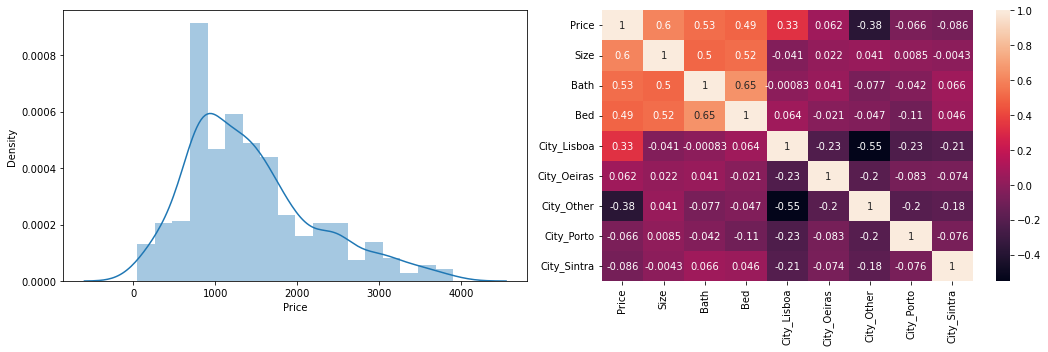

In [30]:
# histogram and heat map
rent_corr = rent2.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(rent2['Price'], ax=axs[0])
sns.heatmap(rent_corr, ax=axs[1], annot=True)
fig.tight_layout()

<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Machine Learning and Clustring Rent Data <font>

In [31]:
# strat train the model , splitting to 20/80 

X = rent2.drop(columns = ['Price'])
y = rent2['Price']

# 20% of the data will be used for testing and 80% will be used for training.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

col = ['Size', 'Bath', 'Bed'] # used to scale data in the same range
scaler = RobustScaler().fit(X_train[col]) # RobustScaler() to scale the columns 'Size', 'Bath', and 'Bed' in the training set
X_train[col] = scaler.transform(X_train[col])

In [32]:
X_train.head()

,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Porto,City_Sintra
294,-0.229358,1.0,0.0,1,0,0,0,0
464,-0.155963,1.0,0.0,0,0,0,0,0
560,0.192661,1.0,0.5,1,0,0,0,0
729,-0.027523,-1.0,-1.0,0,0,1,0,0
476,-0.155963,3.0,0.0,0,0,0,0,1


In [33]:
# used to scale data robustly, particularly useful for data with outliers.


scaler = RobustScaler().fit(X_test[col])    # fit to the X_test data with the columns specified
X_test[col] = scaler.transform(X_test[col]) # then the columns are transformed to the same scale so that the 
                                            # model can be tested accurately

In [34]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train, y_train)

LinearRegression()

In [35]:
# creates a dataframe called cdf_scaled which stores the coefficients 
# calculated from the lm_scaled object for each feature in the X_train dataset.
cdf_scaled = pd.DataFrame(lm_scaled.coef_, index=X_train.columns, columns = ['coefficients'])
# print
cdf_scaled

,coefficients
Size,484.158947
Bath,186.283048
Bed,24.404741
City_Lisboa,-16.698865
City_Oeiras,-201.125179
City_Other,-758.986941
City_Porto,-455.028673
City_Sintra,-678.834405


In [36]:
# checking R2 for train/test
# The R2 score is a measure of how well the linear regression model fits the data

print(lm_scaled.score(X_train, y_train)) # This line prints the R2 score for the training dataset
print(lm_scaled.score(X_test, y_test)) # This line prints the R2 score for the testing dataset



0.6285407606237238
0.647827176818269


In [37]:
# predicts the target variable values for the X_test dataset using the lm_scaled object. 
# The predicted values are stored in the y_pred variable.

y_pred = lm_scaled.predict(X_test)

In [38]:
# MAE measures the average size of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# MSE measures the average of the squares of the errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# RMSE is the square root of the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 331.4049910664282
Mean Squared Error: 194503.74575936544
Root Mean Squared Error: 441.0257880888208


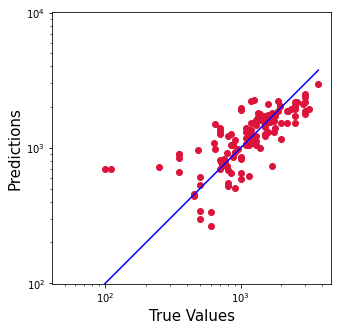

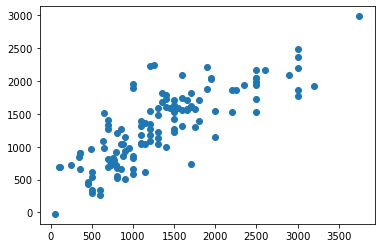

In [39]:
# actual vs predicted

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.scatter(y_test, y_pred)  

In [40]:
# combining the predicted value with input

# adds the predicted values of the X_test dataset to a new column called 'predicted_rent'
X_test['predicted_rent'] = y_pred

# prediction for all data

scaler = RobustScaler().fit(X[col]) # The fit() function finds the mean and standard deviation of the data,
X[col] = scaler.transform(X[col]) # transform() function applies the scaling to the data.

# predicts the target variable values for the entire X dataset and stores them in the y_pred_all variable.
y_pred_all = lm_scaled.predict(X)

# calculates the residuals, which is the difference between the actual values and the predicted values,
# and stores them in the residuals_all variable.
residuals_all = y - y_pred_all



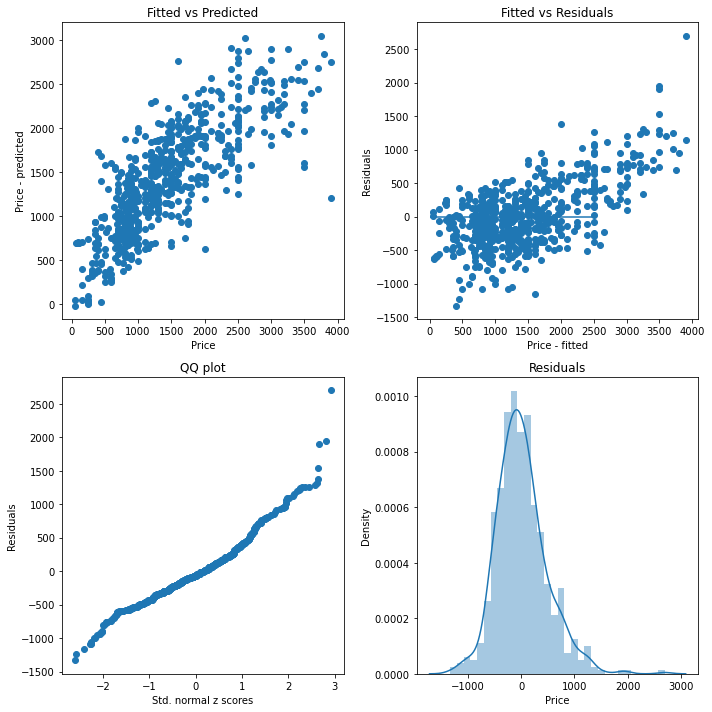

In [41]:
# Evaluate model using charts for all data
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, axs = plt.subplots(2,2, figsize=(10,10))

# relationship between the actual values and the predicted values
plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

# relationship between the actual values and the residuals
plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

# relationship between the random normal z scores and the residuals
plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

# distribution of the residuals
plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()



In [42]:
# Using statsmodels
# library to fit a linear regression model using Ordinary Least Squares (OLS) to the data provided in X_train and y_train
# useful - https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
# https://www.statsmodels.org/stable/regression.html

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pred = model.predict(X_train)
model.summary() # .summary() command is used to generate a summary of the model's results, 
                # which includes information like the coefficients 
                # from this information , we can take the coeff 
                # and show the linear regression equation 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     106.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          4.62e-103
Time:                        19:43:36   Log-Likelihood:                -3890.7
No. Observations:                 512   AIC:                             7799.
Df Residuals:                     503   BIC:                             7838.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1631.3350     88.140     18.509      0.000    1458.168    1804.502
Size          484.1589     32.615     14.845      0.000     420.081     548.237
Bath          186.2830     30.690      6.070      0.000     125.986     246.580
Bed            24.4047     49.194      0.496      0.620     -72.245     121.055
City_Lisboa   -16.6989     91.228     -0.183      0.855    -195.934     162.537
City_Oeiras  -201.1252    119.214     -1.687      0.092    -435.345      33.094
City_Other   -758.9869     93.834     -8.089      0.000    -943.342    -574.632
City_Porto   -455.0287    113.762     -4.000      0.000    -678.536    -231.522
City_Sintra  -678.8344    121.331     -5.595      0.000    -917.213    -440.456
==============================================================================
Omnibus:                       88.904   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.250
Skew:                           0.911   Prob(JB):                     7.32e-45
Kurtosis:                       5.491   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Regression Equation Formula
# Rent = 1631.3350 + 484.1589'size' + 186.2830	'bath' + 24.4047'bed' -16.6989'if in_lisbon' -201.1252 'if in Oeiras' -758.9869'other -455.0287 'if in Porto' -678.8344 if in City Sintra 

In [44]:
# now modeling without the Z scoring
# Train/test split
X = rent2.drop(columns = ['Price'])
y = rent2['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [46]:
# checking R2 for train/test
# The R2 score is a measure of how well the linear regression model fits the data
# not scaling , ( zscore )

print(lm.score(X_train, y_train)) # This line prints the R2 score for the training datase
print(lm.score(X_test, y_test)) # This line prints the R2 score for the testing dataset



0.6496418273593115
0.5491517293355188


In [47]:
y_pred = lm.predict(X_test)

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 359.4408332408295
Mean Squared Error: 205996.57457650075
Root Mean Squared Error: 453.86845514587236


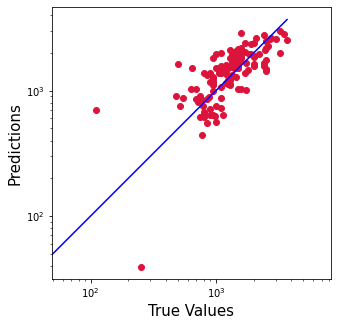

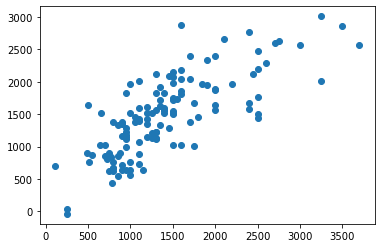

In [49]:
# actual vs predicted

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.scatter(y_test, y_pred)  



In [50]:
# combines the predicted values with the input data and calculates the residuals for the entire dataset.

# adds the predicted values of the X_test dataset to a new column called 'predicted_rent'
X_test['predicted_rent'] = y_pred

# predicts the target variable values for the entire X dataset and stores them in the y_pred_all variable.
y_pred_all = lm.predict(X)

# calculates the residuals, which is the difference between the actual values and the predicted values,
# and stores them in the residuals_all variable.
residuals_all = y - y_pred_all



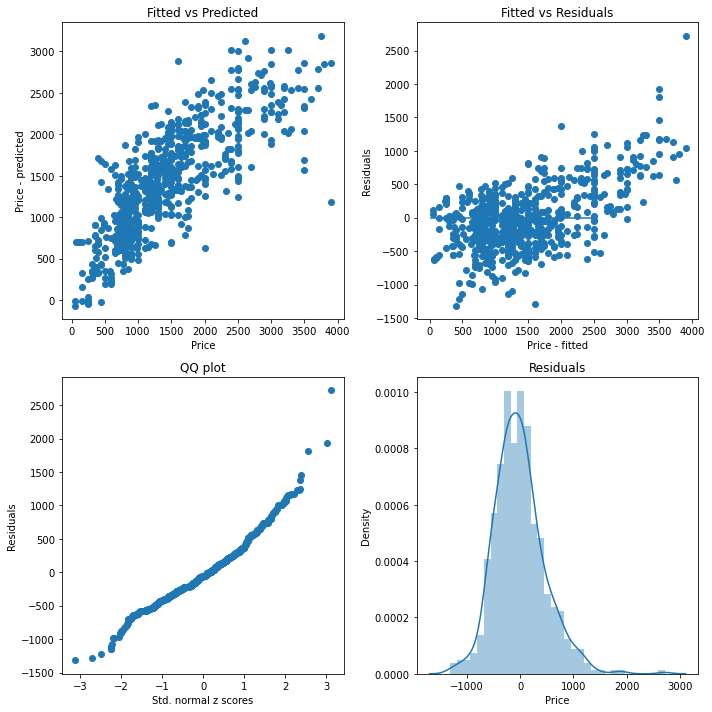

In [51]:
# Evaluate model using charts for all data
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html


fig, axs = plt.subplots(2,2, figsize=(10,10))


# relationship between the actual values and the predicted values
plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')


# relationship between the actual values and the residuals
plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')


# relationship between the random normal z scores and the residuals
plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')


# distribution of the residuals
plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()



In [52]:
# Using statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pred = model.predict(X_train)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     116.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          2.09e-109
Time:                        19:45:51   Log-Likelihood:                -3886.2
No. Observations:                 512   AIC:                             7790.
Df Residuals:                     503   BIC:                             7829.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         610.3528     92.485      6.599      0.000     428.648     792.057
Size            8.9235      0.571     15.627      0.000       7.802      10.045
Bath          173.2899     29.506      5.873      0.000     115.319     231.261
Bed            41.0297     23.759      1.727      0.085      -5.649      87.708
City_Lisboa   -21.8030     86.514     -0.252      0.801    -191.776     148.170
City_Oeiras  -273.9492    112.258     -2.440      0.015    -494.501     -53.398
City_Other   -811.9475     87.979     -9.229      0.000    -984.799    -639.096
City_Porto   -500.4157    111.366     -4.493      0.000    -719.215    -281.616
City_Sintra  -709.7708    115.099     -6.167      0.000    -935.905    -483.637
==============================================================================
Omnibus:                       86.506   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.106
Skew:                           0.882   Prob(JB):                     2.14e-44
Kurtosis:                       5.512   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
## Regression Equation Formula
# Rent = 610.3528 + 8.9235'size' +  173.2899'bath' +  41.0297'bed' -21.8030if in_lisbon' -273.9492 'if in Oeiras' -811.9475'other -500.4157 'if in Porto' -709.7708 if in City Sintra 

<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Prepare Buy Data to ML <font>

In [54]:
# call the data of property to buy
# we are going to train the price column 
# with all the information we concluded with the rent ML
# with this we will get a new column in the buy data
# that will called "predicted rent"
# this column goal is to give us information what is the
# recomended price to rent the properties

In [55]:
# call to the buy file and add 'predicted rent' column 
buydf = pd.read_csv('buy_after_handling.csv')



In [56]:
buydf.head()

,Price,Prop_type,Size,Bath,Bed,City,Division
0,295000,1,140,2,3,Porto,Lordelo do Ouro e Massarelos
1,22500,1,46,0,2,Baião,Ancede e Ribadouro
2,485000,1,152,3,4,Vila do Conde,Vila Chã
3,1250000,1,527,0,10,Porto,Aldoar
4,67000,1,75,1,2,Paços de Ferreira,Carvalhosa


In [57]:
# dropping prop_type
buydf.drop(['Prop_type', 'Division'],1, inplace=True)

In [58]:
city_count = buydf['City'].value_counts()
city_count.head(10)

Lisboa               2048
Sintra                770
Porto                 686
Cascais               610
Braga                 600
Oeiras                547
Vila Nova de Gaia     481
Guimarães             323
Loures                317
Matosinhos            315
Name: City, dtype: int64

In [59]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 550].index)
buydf['City'] = buydf['City'].replace(minor_city, 'Other')
buydf['City'].value_counts()



Other      6077
Lisboa     2048
Sintra      770
Porto       686
Cascais     610
Braga       600
Name: City, dtype: int64

In [60]:
# creating dummy variables for Division
buydf = pd.get_dummies(buydf, drop_first = True)



In [61]:
buydf.head()

,Price,Size,Bath,Bed,City_Cascais,City_Lisboa,City_Other,City_Porto,City_Sintra
0,295000,140,2,3,0,0,0,1,0
1,22500,46,0,2,0,0,1,0,0
2,485000,152,3,4,0,0,1,0,0
3,1250000,527,0,10,0,0,0,1,0
4,67000,75,1,2,0,0,1,0,0


In [62]:
buydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         10791 non-null  int64
 1   Size          10791 non-null  int64
 2   Bath          10791 non-null  int64
 3   Bed           10791 non-null  int64
 4   City_Cascais  10791 non-null  uint8
 5   City_Lisboa   10791 non-null  uint8
 6   City_Other    10791 non-null  uint8
 7   City_Porto    10791 non-null  uint8
 8   City_Sintra   10791 non-null  uint8
dtypes: int64(4), uint8(5)
memory usage: 390.0 KB


In [63]:
# 1 null value in Bath column => remove
buydf = buydf.dropna(subset = ['Bath'])
buydf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         10791 non-null  int64
 1   Size          10791 non-null  int64
 2   Bath          10791 non-null  int64
 3   Bed           10791 non-null  int64
 4   City_Cascais  10791 non-null  uint8
 5   City_Lisboa   10791 non-null  uint8
 6   City_Other    10791 non-null  uint8
 7   City_Porto    10791 non-null  uint8
 8   City_Sintra   10791 non-null  uint8
dtypes: int64(4), uint8(5)
memory usage: 390.0 KB


In [64]:
X = buydf.drop(columns = ['Price'])
buydf['predicted_rent'] = lm.predict(X)



<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Results <font>

In [65]:
buydf.head() # rent value added



,Price,Size,Bath,Bed,City_Cascais,City_Lisboa,City_Other,City_Porto,City_Sintra,predicted_rent
0,295000,140,2,3,0,0,0,1,0,1828.899446
1,22500,46,0,2,0,0,1,0,0,290.946897
2,485000,152,3,4,0,0,1,0,0,1838.769698
3,1250000,527,0,10,0,0,0,1,0,5222.931309
4,67000,75,1,2,0,0,1,0,0,723.019019


In [66]:
buydf.to_csv(r'Buy_With_Predicted_Rent.csv', index = False, header=True)
